<a href="https://colab.research.google.com/github/azal17/computer_networks/blob/main/computer_networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ifrah: stop and wait
physical layer: line encoding

Enter the bitstream: 10101


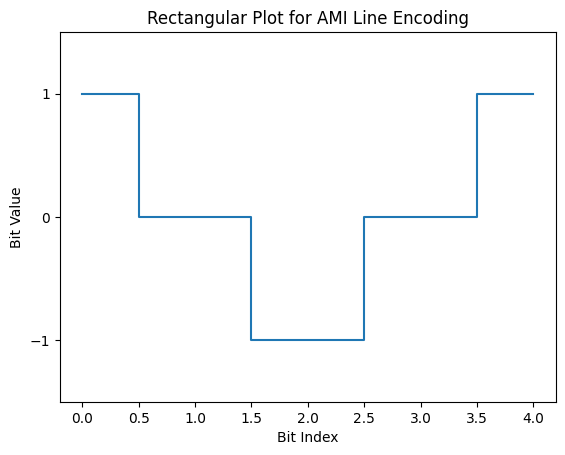

In [ ]:
import i as plt

def plot(x, y):
    plt.step(x, y, where='mid')
    plt.xlabel('Bit Index')
    plt.ylabel('Bit Value')
    plt.title('Rectangular Plot for AMI Line Encoding')
    plt.yticks([-1, 0, 1])
    plt.ylim(-1.5, 1.5)
    plt.show()

def AMI():
    bitstream = input("Enter the bitstream: ")
    input_array = range(len(bitstream))
    output_array = []
    count = 0
    for char in bitstream:
        if char == '0':
            output_array.append(0)
        elif char == '1':
            if count % 2 == 0:
                output_array.append(1)
            else:
                output_array.append(-1)
            count += 1
    plot(input_array, output_array)

AMI()


# Stop and Wait


In [ ]:
import time
import random
def send_frame(i,n):
  if i != 0:
    print(f"I am the ack of {i-1}")
  print(f"I am the {i} frame and I am sending the message")
  if i== n-1:
    print(f"I am the ack of {i}")
def resend_frame(i):
  print(f"I am the {i-1} frame and I am resending the message")

def stop_and_wait():
  N = int(input("Enter the number of devices: "))

  i=0
  send_frame(i,N)
  for i in range(1,N):
    ack = random.randint(0,1)
    if ack != 0:
      send_frame(i,N)


    else:
      print(f"ack of {i-1} frame was lost")
      time.sleep(1)
      resend_frame(i)
      send_frame(i,N)


stop_and_wait()

Enter the number of devices: 3
I am the 0 frame and I am sending the message
I am the ack of 0
I am the 1 frame and I am sending the message
I am the ack of 1
I am the 2 frame and I am sending the message
I am the ack of 2


# Token passing


In [ ]:
def send_frame(i,t):
  print(f"I am the {i} frame and I have the {t} token")

def delayed_token_passing():
  N = int(input("Enter the number of devices: "))
  i=0
  token=0
  while i<N:
    j=0
    token=0
    while j<N:
      if i==j and j==token:
        send_frame(j%N,token)
      token+=1
      j+=1
    i+=1
delayed_token_passing()

Enter the number of devices: 4
I am the 0 frame and I have the 0 token
I am the 1 frame and I have the 1 token
I am the 2 frame and I have the 2 token
I am the 3 frame and I have the 3 token


In [ ]:
def send_frame(i,t):
  print(f"I am the {i} frame and I have the {t}  token")

def token_passing():
  N = int(input("Enter the number of devices: "))
  i=0
  while i<N:
    j=0
    token = 0
    while j<N:
      if token==j:
        send_frame(j%N,token)
        token+=1
      j+=1
    i+=1
token_passing()

Enter the number of devices: 5
I am the 0 frame and I have the 0  token
I am the 1 frame and I have the 1  token
I am the 2 frame and I have the 2  token
I am the 3 frame and I have the 3  token
I am the 4 frame and I have the 4  token
I am the 0 frame and I have the 0  token
I am the 1 frame and I have the 1  token
I am the 2 frame and I have the 2  token
I am the 3 frame and I have the 3  token
I am the 4 frame and I have the 4  token
I am the 0 frame and I have the 0  token
I am the 1 frame and I have the 1  token
I am the 2 frame and I have the 2  token
I am the 3 frame and I have the 3  token
I am the 4 frame and I have the 4  token
I am the 0 frame and I have the 0  token
I am the 1 frame and I have the 1  token
I am the 2 frame and I have the 2  token
I am the 3 frame and I have the 3  token
I am the 4 frame and I have the 4  token
I am the 0 frame and I have the 0  token
I am the 1 frame and I have the 1  token
I am the 2 frame and I have the 2  token
I am the 3 frame and I hav

# Izma: Access control:Data link Layer,Aloha, Nodes


In [ ]:
import random
import time

def send_frame(T_p,i):
  print(f"I am the {i} frame and I am being sent")
  time.sleep(2*T_p)
  print(f"I am ack of {i}")
def Aloha():
  k_max = 4
  k = 0
  T_p = 1

  while k<=k_max:
        if k == 0:
           print(k)
           send_frame(T_p,k)
        else:
            R = random.randint(0,(2**k)-1)
            time.sleep(R*T_p)
            print(k)
            send_frame(T_p,k)
        k+=1

  print("Abort")

Aloha()


0
I am the 0 frame and I am being sent
I am ack of 0
1
I am the 1 frame and I am being sent
I am ack of 1
2
I am the 2 frame and I am being sent
I am ack of 2
3
I am the 3 frame and I am being sent
I am ack of 3
4
I am the 4 frame and I am being sent
I am ack of 4
Abort


In [ ]:
class Switch:
    def __init__(self, device):
        self.device = device
        self.mapping = {}

    def get_switch_details(self):
        for i in range(self.device.n):
            sender, receiver = input("Enter sender and receiver: ").split()
            if i == 0:
                for j in range(self.device.N):

                  self.mapping[self.device.get_products()[j].name] = self.device.get_products()[j].mac_address
                print("Message from", sender, "broadcasted to all devices")
            else:
                print("Message received by", receiver, "at address", self.mapping.get(receiver, "Unknown"))


class Device:
    def __init__(self):
        self.name = None
        self.mac_address = None
        self.N = None
        self.queries = None

    def get_details(self):
        self.N = int(input("User enters the number of devices\n"))
        self.n = int(input("User enters the number of queries\n"))

    def get_products(self):
        devices = []
        for i in range(self.N):
            device = Device()
            device.name = chr(65 + i)
            device.mac_address = 100 * (i + 1)
            devices.append(device)
        return devices
    def domains(self):
      print(f"The number of collision domains is {self.N}")
      print(f"The number of broadcast domains is {1}")


def main():
    d = Device()
    d.get_details()
    products = d.get_products()
    d.domains()
    s = Switch(d)
    s.get_switch_details()
    del products


if __name__ == "__main__":
    main()


User enters the number of devices
5
User enters the number of queries
4
The number of collision domains is 5
The number of broadcast domains is 1
Enter sender and receiver: A B
Message from A broadcasted to all devices
Enter sender and receiver: B C
Message received by C at address 300
Enter sender and receiver: D E
Message received by E at address 500
Enter sender and receiver: E A
Message received by A at address 100


Enter the number of queries: 4
There are 4 collision domains and 2 broadcast domains
Enter the sender and receiver D1 D2
Message broadcasted in both domains at address Unknown and Unknown
Enter the sender and receiver D3 D6
Message broadcasted in H1 domain at address 100 and in H2 domain at address 200
Enter the sender and receiver D5 D6
Message broadcasted in H1 domain at address 100 and in H2 domain at address 200
Enter the sender and receiver D7 D8
Message broadcasted in H2 domain at address 200 and 200


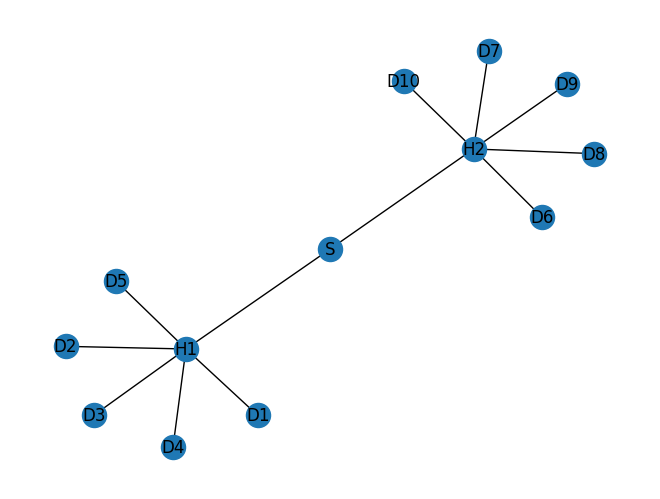

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
G = nx.Graph()

# Add nodes
G.add_node('D1')
G.add_node('D2')
G.add_node('D3')
G.add_node('D4')
G.add_node('D5')
G.add_node('D6')
G.add_node('D7')
G.add_node('D8')
G.add_node('D9')
G.add_node('D10')
G.add_node('H1')
G.add_node('H2')
G.add_node('S')

# Add edges
G.add_edge('D1', 'H1')
G.add_edge('D2', 'H1')
G.add_edge('D3', 'H1')
G.add_edge('D4', 'H1')
G.add_edge('D5', 'H1')
G.add_edge('D6', 'H2')
G.add_edge('D7', 'H2')
G.add_edge('D8', 'H2')
G.add_edge('D9', 'H2')
G.add_edge('D10', 'H2')
G.add_edge('H1', 'S')
G.add_edge('H2', 'S')




def transmit():
  N = int(input("Enter the number of queries: "))
  print("There are 4 collision domains and 2 broadcast domains")
  node_addresses = {}
  G.nodes['H1']['address'] = 100
  j=1
  for neighbor in G.neighbors('H1'):
    if neighbor != 'S':
      G.nodes[neighbor]['address'] = 100+j
      j+=1
  G.nodes['H2']['address'] = 200
  j=1
  for neighbor in G.neighbors('H2'):
    if neighbor != 'S':
      G.nodes[neighbor]['address'] = 200+j
      j+=1

  for i in range(N):
    sender,receiver = input("Enter the sender and receiver ").split()
    if i == 0:
      print(f"Message broadcasted in both domains at address {node_addresses.get(sender,'Unknown')} and {node_addresses.get(receiver,'Unknown')}")
      node_addresses['H1'] = G.nodes['H1']['address']
      node_addresses['H2'] = G.nodes['H2']['address']
    elif G.has_edge(sender,'H1') and G.has_edge(receiver,'H1'):
        print(f"Message broadcasted in H1 domain at address {node_addresses.get('H1','Unknown')} and {node_addresses.get('H1','Unknown')}")
    elif G.has_edge(sender,'H2') and G.has_edge(receiver,'H2'):
        print(f"Message broadcasted in H2 domain at address {node_addresses.get('H2','Unknown')} and {node_addresses.get('H2','Unknown')}")
    elif G.has_edge(sender,'H1') and G.has_edge(receiver,'H2'):
        print(f"Message broadcasted in H1 domain at address {node_addresses.get('H1','Unknown')} and in H2 domain at address {node_addresses.get('H2','Unknown')}")
    elif G.has_edge(sender,'H2') and G.has_edge(receiver,'H1'):
        print(f"Message broadcasted in H2 domain at address {node_addresses.get('H2','Unknown')} and and in H1 domain at address{node_addresses.get('H1','Unknown')}")

transmit()
nx.draw(G,with_labels=True)
plt.show()

# Azal: error control hamming and extra crc, physical layer

```
# add these mac addresses
A7:11:A7:BB:A1:12
17:11:A7:BB:A1:12
19:11:A7:BB:A1:13
1C:00:FF:99:BC:AA
1D:00:FF:00:2A:AB
1A:00:FF:16:B3:BC
1A:00:FF:0A:B2:DE
1B:00:FF:97:EC:FF
```




# GBN ARQ

In [ ]:
import random
def send_frame(i):
  print(f"The {i} frame was sent")
def ack(i):
  print(f"The {i+1}th frame should be sent")
m = int(input("Enter the number of bits "))

def gbn():
  window_size = 2**m -1
  receiver = [i for i in range(2**m)]
  sender = [i for i in range(2**m)]

  k = 0
  for i in range(2**m -1):

    send_frame(i)

    ack(i)
    k+=1
    if i == window_size-1:
      print(f"successful transmission {k}")


def failackgbn():
  window_size = 2**m -1
  receiver = [i for i in range(2**m)]
  sender = [i for i in range(2**m)]

  k = 0
  for i in range(2**m -1):

    send_frame(i)
    acknum = random.randint(0,1)
    if acknum != 0 :
        ack(i)
    k+=1
    if i == window_size-1 :
        if acknum==1:
          print("successful transmission")
        else:
          print(f"needs retransmission and k is {k} ")
          # gbn()
def failsendinggbn():
  window_size = 2**m -1
  receiver = [i for i in range(2**m)]
  sender = [i for i in range(2**m)]

  k = 0
  for i in range(2**m -1):

    num = random.randint(0,1)
    if num != 0:
      send_frame(i)
      ack(i)
      k+=1
    if i == window_size-1 :
      if k == window_size - 1:
        print(f"successful transmission {k}")
      else:
        print(f"needs retransmission and k is {k} ")
          # gbn()


gbn()
failackgbn()
failsendinggbn()

Enter the number of bits 1
The 0 frame was sent
The 1th frame should be sent
successful transmission 1
The 0 frame was sent
The 1th frame should be sent
successful transmission
successful transmission 0


# Physical layer


In [ ]:



class EndDevice:
    def __init__(self, device_id, mac_address):
        self.device_id = device_id
        self.mac_address = mac_address

class Sender:
    def __init__(self, sender_address):
        self.sender_address = sender_address

    def send_message(self):
        return input("Enter the message to be sent by the sender device with mac address: " + str(self.sender_address) + "\n")

class Hub:
    def __init__(self, message, sender_address, *device_addresses): #device address is mac address
        print("\n\033[3mConnection between Hub and each device:\033[0m")
        for i, address in enumerate(device_addresses, 1): # start from 1 , will give the index and iterable address value
            print("HUB ------> Device:", i)
        print()
        for address in device_addresses:
            print("\033[3mHub is broadcasting message \"" + message + "\" from sender with address = " + sender_address + " to device with MAC address = " + address + "\033[0m")

class Receiver:
    def __init__(self, receiver_mac, device_id):
        self.receiver_mac = receiver_mac
        self.device_id = device_id

    def received_message(self, receiver_mac, message, device_id):
        if receiver_mac == self.receiver_mac:
            print("Message received = \"" + message + "\" by receiver Device: " + str(device_id) + " with MAC address: " + receiver_mac)
        else:
            print("Device: " + str(device_id) + " is not the designated reciever") # print statements use string, concatenates string only

def main():
    total_devices = int(input("Enter the number of devices in the connection: "))
    devices = []
    for i in range(total_devices):
        mac_address = input("Enter MAC address for device {}: ".format(i+1))
        devices.append(EndDevice(i+1, mac_address))

    print("Devices created successfully.")
    topology= int(input("Select the type of connection: 1.) Star 2.)Dedicated Connection "))

    #Star topology
    if topology == 1:

      print("You have chosen: Star Topology")
      sender_address = input("Enter the MAC address for the sender device: ")

      for i in range(total_devices):
          if sender_address == devices[i].mac_address:
              sender = Sender(sender_address)
              message = sender.send_message()
              print("\n\033[3mSender device is sending message \"" + message + "\" to the Hub\033[0m") #ansi escape sequence

              device_addresses = [device.mac_address for device in devices] #saving the mac addresses in the list

              hub = Hub(message, sender_address, *device_addresses)# * will seperate each argument i.e each mac address

              receiver_mac = input("Enter the MAC address for the receiver device: ")
              receiver = Receiver(receiver_mac, total_devices)
              print()
              for device in devices:
                  receiver.received_message(device.mac_address, message, device.device_id)
              break
          else:
              continue
      else:
          print("\033[3mWarning: Enter a valid MAC address from the entered list of address.\033[0m")







    #Dedicated links
    elif topology == 2:
      print("You have chosen: Dedicated Connection")
      sender_address = input("Enter the MAC address for the sender device: ")

      for i in range(total_devices):
          if sender_address == devices[i].mac_address:
              sender = Sender(sender_address)
              message = sender.send_message()

              receiver_mac = input("Enter the MAC address for the receiver device: ")
              for i in range(total_devices):
                  if receiver_mac == devices[i].mac_address:
                      print("\033[3mSending\033[0m " " + str(message) + " "\033[3mfrom device with mac address\033[0m " + str(sender_address) + " \033[3mto device with mac address\033[0m " + str(receiver_mac))
                      print("Message Recievd!")

                      break
                  else:
                      continue
              else:
                  print("\033[3mWarning: Enter a valid MAC address from the entered list of address.\033[0m")




              break
          else:
              continue
      else:
          print("\033[3mWarning: Enter a valid MAC address from the entered list of address.\033[0m")




    else:
        print("Invalid choice.")


if __name__ == "__main__":
    main()


Enter the number of devices in the connection: 5
Enter MAC address for device 1: 100
Enter MAC address for device 2: 200
Enter MAC address for device 3: 300
Enter MAC address for device 4: 400
Enter MAC address for device 5: 500
Devices created successfully.
Select the type of connection: 1.) Star 2.)Dedicated Connection 1
You have chosen: Star Topology
Enter the MAC address for the sender device: 100
Enter the message to be sent by the sender device with mac address: 100
10000101

Sender device is sending message "10000101" to the Hub

Connection between Hub and each device:
HUB ------> Device: 1
HUB ------> Device: 2
HUB ------> Device: 3
HUB ------> Device: 4
HUB ------> Device: 5

Hub is broadcasting message "10000101" from sender with address = 100 to device with MAC address = 100
Hub is broadcasting message "10000101" from sender with address = 100 to device with MAC address = 200
Hub is broadcasting message "10000101" from sender with address = 100 to device with MAC address = 3

#**Hamming - Encoder (Sender Side)**

> test cases 1011 0110 1110: change to 1111



In [ ]:
#sender side , 7 bit hamming code
import numpy as np

n = int(input("Enter the size of dataword array: ")) #has to be of 4 bits

data_word = np.empty(n, dtype=int)  # Create an empty NumPy array for dataword

for i in range(n):
    element = int(input("Enter element {}: ".format(i + 1)))
    data_word[i] = element

print("NumPy Array Dataword:", data_word)

code_word = np.zeros(n, dtype=int)  # Hamming code with 3 parity bits

code_word[:n] = data_word  # Copy data_word into code_word, starts from 0 not 1

1


# 1 2 4 = 6 5 3
code_word = np.insert(code_word, 3, 0)  # p4
code_word = np.insert(code_word, 5, 0)  # p2
code_word = np.insert(code_word, 6, 0)  # p1

print("NumPy Array Codeword with Empty Parity Bits:", code_word)

#parity calculation

p1 = code_word[0]^code_word[2]^code_word[4] # 1 3 5 7 here corresponds to 0 2 4 6 , ^ = xor
p2 = code_word[0]^code_word[1]^code_word[4] # 2 3 6 7 , 0 1 4 5
p4 = code_word[0]^code_word[1]^code_word[2] # 4 5 6 7 , 0 1 2 3
print("p1: ", p1)
print("p2: ", p2)
print("p4: ", p4)

code_word[3] = p4
code_word[5] = p2
code_word[6] = p1


print("Final Codeword:", code_word)

Enter the size of dataword array: 4
Enter element 1: 1
Enter element 2: 1
Enter element 3: 1
Enter element 4: 1
NumPy Array Dataword: [1 1 1 1]
NumPy Array Codeword with Empty Parity Bits: [1 1 1 0 1 0 0]
p1:  1
p2:  1
p4:  1
Final Codeword: [1 1 1 1 1 1 1]


# **Hamming-Decoder (Reciever)**

In [ ]:
import numpy as np

n = int(input("Enter the size of array: "))

codeword = np.empty(n, dtype=int)  # Create an empty NumPy array for codeword

for i in range(n):
    element = int(input("Enter element {}: ".format(i )))
    codeword[i] = element

print("NumPy Array Codeword:", codeword)

p1 = codeword[0] ^ codeword[2] ^ codeword[4]^codeword[6]
p2 = codeword[0] ^ codeword[1] ^ codeword[4]^codeword[5]
p4 = codeword[0] ^ codeword[1] ^ codeword[2]^codeword[3]

print("p1:", p1)
print("p2:", p2)
print("p4:", p4)

# Create the syndrome as a string
syndrome = str(p4) + str(p2) + str(p1)  # p4 p2 p1

print("Syndrome:", syndrome)

if syndrome != "000":
    print("Error detected")
    # Convert the binary representation of the syndrome string to an integer
    position_correction = int(syndrome, 2)
    print("Position Correction:", position_correction)
    # Correct the bit at the detected position
    codeword[n-position_correction] ^= 1  # Flip the bit
    print("Corrected Codeword:", codeword)
else:
    print("No error detected")




Enter the size of array: 7
Enter element 0: 1
Enter element 1: 1
Enter element 2: 1
Enter element 3: 1
Enter element 4: 1
Enter element 5: 1
Enter element 6: 1
NumPy Array Codeword: [1 1 1 1 1 1 1]
p1: 0
p2: 0
p4: 0
Syndrome: 000
No error detected


# CRC Encoder
>The code works for binary stream as well as polynomial stream


```
# works for: 1101011011, 10011 or x9+x8+x6+x4+x3+x+1, x4+x+1
```



In [ ]:
# CRC encoder
import numpy as np

# Binary division function
def binary_division(dataword, divisor):
    dataword_int = int("".join(map(str, dataword)), 2)  # Convert dataword array to integer
    divisor_int = int("".join(map(str, divisor)), 2)  # Convert divisor array to integer

    while dataword_int >= divisor_int:  # Continue until the length of dataword is greater than or equal to the length of the divisor
        shift = len(bin(dataword_int)) - len(bin(divisor_int))  # Calculate the number of times to shift the divisor
        dataword_int ^= (divisor_int << shift)  # Subtract the shifted divisor from the dataword using bitwise XOR

    remainder_bin = bin(dataword_int)[2:]  # Convert the remainder back to binary string
    remainder = np.array([int(bit) for bit in remainder_bin])  # Convert binary string to array
    return remainder

# Input dataword and divisor
choice = input("Choose an option: 1) Bits, 2) Polynomial: ")

if choice == "1":  # Input as individual bits
    n = int(input("Enter the number of bits for dataword: "))
    dataword = np.empty(n, dtype=int)
    for i in range(n):
        element = int(input("Enter the {}st bit: ".format(i+1)))
        dataword[i] = element

    print("Entered dataword:", dataword)

    m = int(input("Enter the number of bits for divisor: "))
    divisor = np.empty(m, dtype=int)
    for i in range(m):
        element = int(input("Enter the {}st bit: ".format(i+1)))
        divisor[i] = element

    print("Entered divisor:", divisor)

    syndrome_length = m - 1  # 1 less than the length of the divisor
    augmented_dataword = np.concatenate((dataword, np.zeros(syndrome_length, dtype=int)))  # Concatenate dataword with zeros for syndrome
    remainder = binary_division(augmented_dataword, divisor)
    print("Remainder:", remainder)

    codeword = np.concatenate((dataword, remainder))
    print("Codeword:", codeword)

elif choice == "2":  # Input as polynomial
    n = int(input("Enter the degree of polynomial dataword: ")) + 1
    dataword = np.empty(n, dtype=int)
    for i in range(n):
        element = int(input("Enter the coefficient of x^{}: ".format(n - i - 1)))
        dataword[i] = element

    print("Entered dataword: ", dataword)
    print("Entered polynomial dataword: ")

    polynomial_dataword = ""
    for i in range(n):
        if dataword[i] != 0:
            polynomial_dataword += "x^{} + ".format(n - i - 1)
        else:
            continue

    polynomial_dataword = polynomial_dataword[:-3]  # Remove extra "+"
    print(polynomial_dataword)

    m = int(input("Enter the degree of generator polynomial : ")) + 1
    divisor = np.empty(m, dtype=int)
    for i in range(m):
        element = int(input("Enter the coefficient of x^{}: ".format(m - i - 1)))
        divisor[i] = element

    print("Entered divisor: ", divisor)
    print("Entered generator polynomial : ")

    polynomial_divisor = ""
    for i in range(m):
        if divisor[i] != 0:
            polynomial_divisor += "x^{} + ".format(m - i - 1)
        else:
            continue

    polynomial_divisor = polynomial_divisor[:-3]  # Remove extra "+"
    print(polynomial_divisor)

    syndrome_length = m - 1  # 1 less than the length of the divisor
    augmented_dataword = np.concatenate((dataword, np.zeros(syndrome_length, dtype=int)))  # Concatenate dataword with zeros for syndrome
    remainder = binary_division(augmented_dataword, divisor)
    print("Remainder:", remainder)

    codeword = np.concatenate((augmented_dataword, remainder))
    print("Codeword:", codeword)

    a = len(remainder)

    print("Polynomial Remainder: ")
    k = ""
    for i in range(a):
        if remainder[i] != 0:
            k += "x^{} + ".format(a - i-1)
        else:
            continue
    k = k[:-3]
    print(k)



    b = len(augmented_dataword)

    print("Polynomial Codeword: ")
    l = ""
    for i in range(b):
        if augmented_dataword[i] != 0:
            l += "x^{} + ".format(b - i-1)
        else:
            continue
    print(l,end = "")

    z = ""
    for i in range(a):
        if remainder[i] != 0:
            z += "x^{} + ".format(a - i-1)
        else:
            continue

    z = z[:-3]
    print(z)

else:
    print("Invalid option. Please choose either '1' or '2'.")
    exit()


Choose an option: 1) Bits, 2) Polynomial: 2
Enter the degree of polynomial dataword: 9
Enter the coefficient of x^9: 1
Enter the coefficient of x^8: 1
Enter the coefficient of x^7: 0
Enter the coefficient of x^6: 1
Enter the coefficient of x^5: 0
Enter the coefficient of x^4: 1
Enter the coefficient of x^3: 1
Enter the coefficient of x^2: 0
Enter the coefficient of x^1: 1
Enter the coefficient of x^0: 1
Entered dataword:  [1 1 0 1 0 1 1 0 1 1]
Entered polynomial dataword: 
x^9 + x^8 + x^6 + x^4 + x^3 + x^1 + x^0
Enter the degree of geneartor polynomial : 4
Enter the coefficient of x^4: 1
Enter the coefficient of x^3: 0
Enter the coefficient of x^2: 0
Enter the coefficient of x^1: 1
Enter the coefficient of x^0: 1
Entered divisor:  [1 0 0 1 1]
Entered generator polynomial : 
x^4 + x^1 + x^0
Remainder: [1 1 1 0]
Codeword: [1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0]
Polynomial Remainder: 
x^3 + x^2 + x^1
Polynomial Codeword: 
x^13 + x^12 + x^10 + x^8 + x^7 + x^5 + x^4 + x^3 + x^2 + x^1


# CRC Decoder


In [ ]:
#crc decoder
import numpy as np

# Binary division function
def binary_division(dataword, divisor):
    dataword_int = int("".join(map(str, dataword)), 2)  # Convert dataword array to integer
    divisor_int = int("".join(map(str, divisor)), 2)  # Convert divisor array to integer

    while dataword_int >= divisor_int:  # Continue until the length of dataword is greater than or equal to the length of the divisor
        shift = len(bin(dataword_int)) - len(bin(divisor_int))  # Calculate the number of times to shift the divisor
        dataword_int ^= (divisor_int << shift)  # Subtract the shifted divisor from the dataword using bitwise XOR

    remainder_bin = bin(dataword_int)[2:]  # Convert the remainder back to binary string
    remainder = np.array([int(bit) for bit in remainder_bin])  # Convert binary string to array
    return remainder

choice = input("Choose an option: 1) Bits, 2) Polynomial: ")

if choice == "1":  # Input as individual bits
    # Input codeword and divisor
    n = int(input("Enter the number of bits for codeword: "))
    codeword = np.empty(n, dtype=int)
    for i in range(n):
        element = int(input("Enter the {}st bit: ".format(i+1)))
        codeword[i] = element

    print("Entered codeword:", codeword)

    m = int(input("Enter the number of bits for divisor: "))
    divisor = np.empty(m, dtype=int)
    for i in range(m):
        element = int(input("Enter the {}st bit: ".format(i+1)))
        divisor[i] = element

    print("Entered divisor:", divisor)

    # Perform binary division
    remainder = binary_division(codeword, divisor)

    # Check if remainder is zero
    if np.all(remainder == 0):
        print("No errors detected. Frame transmitted successfully!")
    else:
        print("Error detected!")

elif choice == "2":
    n = int(input("Enter the degree of polynomial codeword: "))+1
    codeword = np.empty(n, dtype=int)
    for i in range(n):
        element = int(input("Enter the coefficient of x^{}: ".format(n - i - 1)))
        codeword[i] = element

    print("Entered codeword:", codeword)
    print("Entered polynomial codeword: ")

    polynomial_codeword = ""
    for i in range(n):
        if codeword[i] != 0:
             polynomial_codeword += "x^{} + ".format(n - i - 1)
        else:
            continue

    polynomial_codeword =  polynomial_codeword[:-3]  # Remove extra "+"
    print( polynomial_codeword)

    m = int(input("Enter the degree of polynomial  generator: "))+1
    divisor = np.empty(m, dtype=int)
    for i in range(m):
        element = int(input("Enter the coefficient of x^{}: ".format(m - i - 1)))
        divisor[i] = element

    print("Entered divisor:", divisor)
    print("Entered generator polynomial : ")

    polynomial_divisor = ""
    for i in range(m):
        if divisor[i] != 0:
            polynomial_divisor += "x^{} + ".format(m - i - 1)
        else:
            continue

    polynomial_divisor = polynomial_divisor[:-3]  # Remove extra "+"
    print(polynomial_divisor)
    remainder = binary_division(codeword, divisor)

    # Check if remainder is zero
    if np.all(remainder == 0):
        print("No errors detected. Frame transmitted successfully!")
    else:
        print("Error detected!")
else:
    print("Invalid option. Please choose either '1' or '2'.")
    exit()


Choose an option: 1) Bits, 2) Polynomial: 2
Enter the degree of polynomial codeword: 6
Enter the coefficient of x^6: 1
Enter the coefficient of x^5: 0
Enter the coefficient of x^4: 0
Enter the coefficient of x^3: 1
Enter the coefficient of x^2: 1
Enter the coefficient of x^1: 1
Enter the coefficient of x^0: 0
Entered codeword: [1 0 0 1 1 1 0]
Entered polynomial codeword: 
x^6 + x^3 + x^2 + x^1
Enter the degree of polynomial  generator: 3
Enter the coefficient of x^3: 1
Enter the coefficient of x^2: 1
Enter the coefficient of x^1: 1
Enter the coefficient of x^0: 1
Entered divisor: [1 1 1 1]
Entered generator polynomial : 
x^3 + x^2 + x^1 + x^0
Error detected!
